Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [58]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [59]:
# uploading dataset
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [60]:
Fraud_check=pd.read_csv("Fraud_check.csv")
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# **EDA**

In [61]:
Fraud_check.shape

(600, 6)

In [62]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [63]:
Fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [64]:
# cheching for duplicates
Fraud_check[Fraud_check.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [65]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
Fraud_check["TaxInc"] = pd.cut(Fraud_check["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [66]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [67]:
Fraud_check['TaxInc'].value_counts()

Good     476
Risky    124
Name: TaxInc, dtype: int64

In [68]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check['TaxInc']= label_encoder.fit_transform(Fraud_check['TaxInc'])

In [69]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,0
596,YES,Divorced,69967,55369,2,YES,0
597,NO,Divorced,47334,154058,0,YES,0
598,YES,Married,98592,180083,17,NO,0


In [70]:
Fraud_check['TaxInc'].value_counts()

0    476
1    124
Name: TaxInc, dtype: int64

In [71]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check['Undergrad']= label_encoder.fit_transform(Fraud_check['Undergrad'])
Fraud_check['Marital.Status']= label_encoder.fit_transform(Fraud_check['Marital.Status'])
Fraud_check['Urban']= label_encoder.fit_transform(Fraud_check['Urban'])


In [72]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


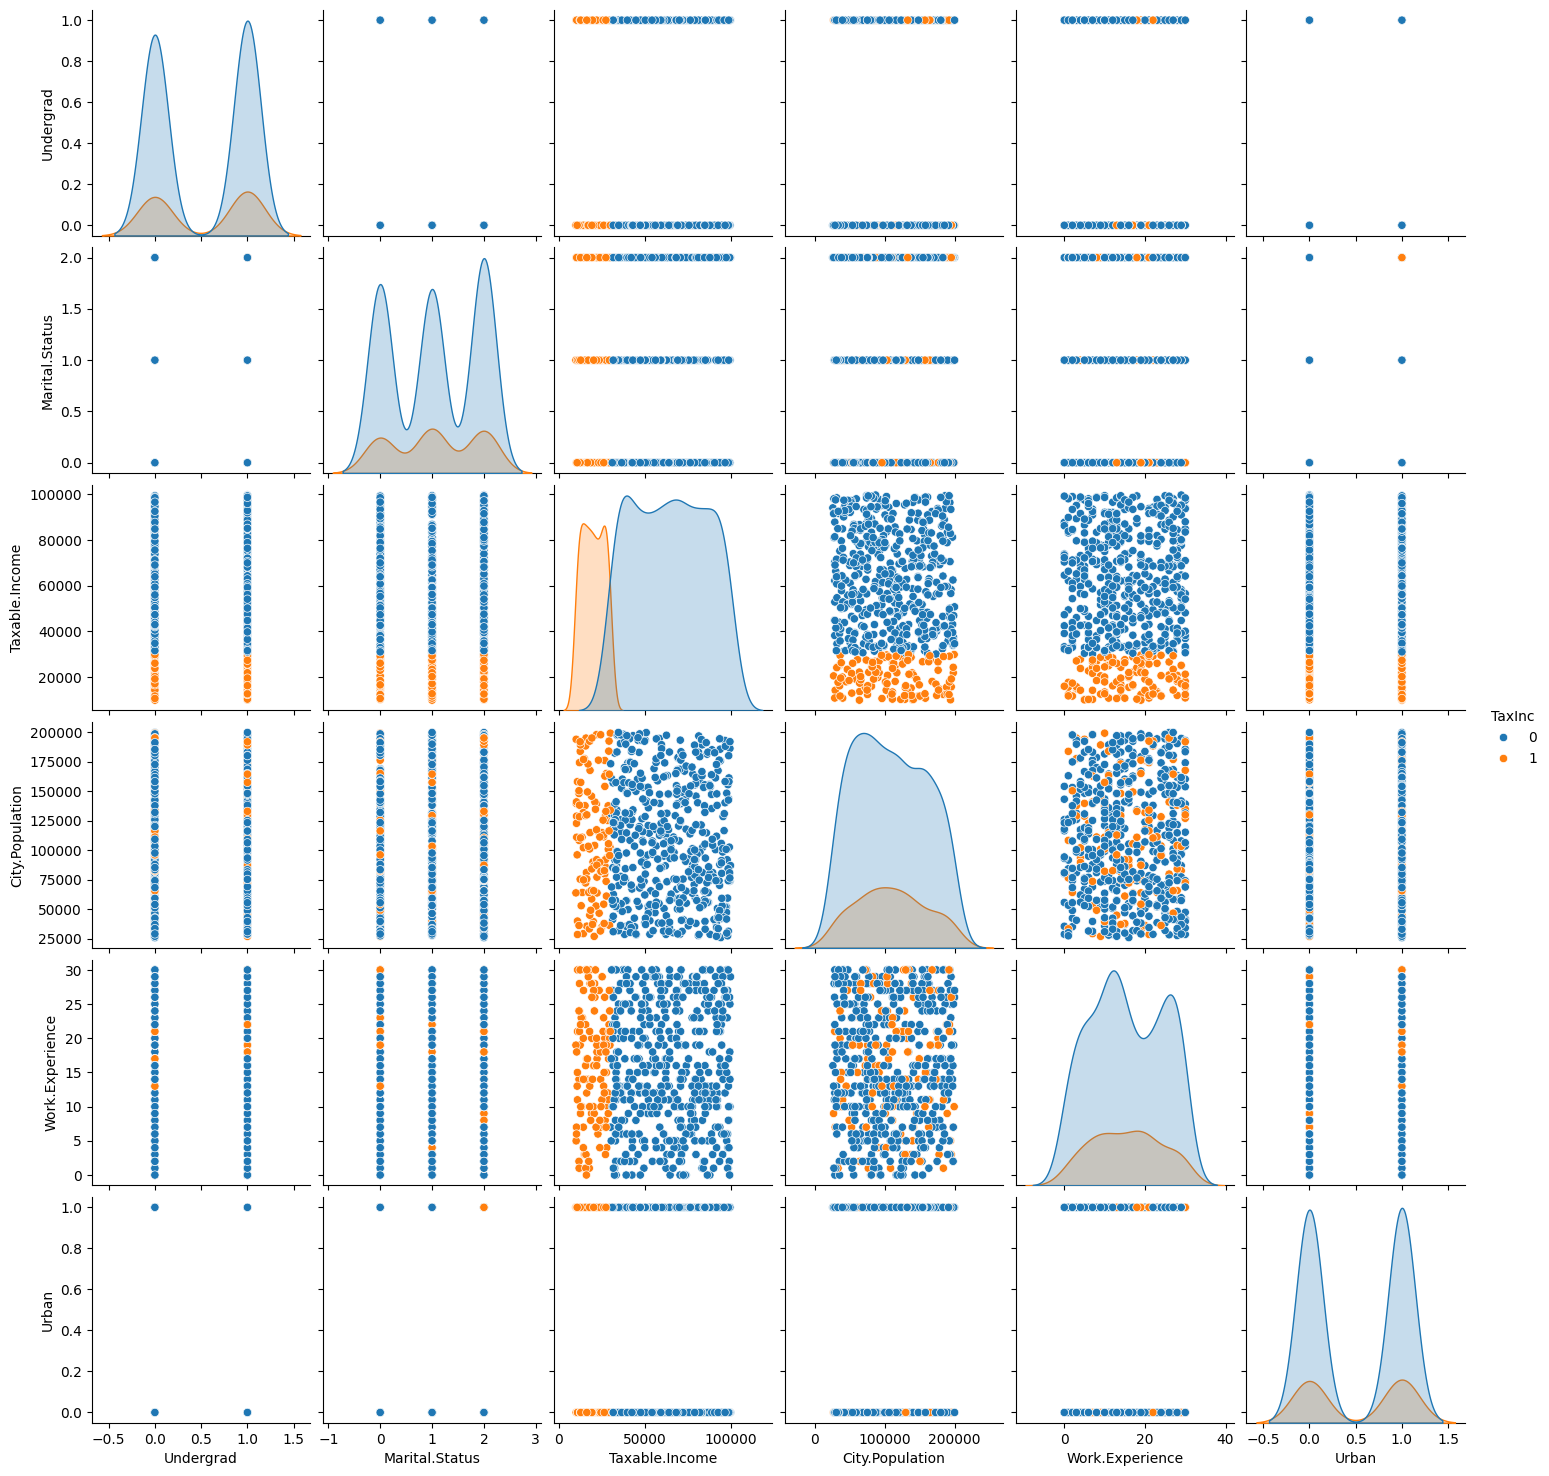

In [73]:
import seaborn as sns
sns.pairplot(data=Fraud_check, hue = 'TaxInc')

In [74]:
x=Fraud_check.iloc[:, list(range(0, 2)) + list(range(3, 6))]
y=Fraud_check['TaxInc']

In [75]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [86]:
x = norm_func(x.iloc[:,0:])
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [77]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TaxInc, Length: 600, dtype: int64

# **Splitting data into training and testing data set**

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [88]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
3,1.0,1.0,0.962563,0.500000,1.0
149,0.0,1.0,0.136357,0.833333,0.0
212,1.0,0.0,0.499313,0.466667,0.0
585,0.0,1.0,0.642780,0.066667,1.0
524,1.0,0.5,0.796625,0.900000,0.0
...,...,...,...,...,...
440,0.0,1.0,0.831200,0.433333,1.0
165,1.0,0.5,0.072897,0.766667,1.0
7,1.0,1.0,0.606176,0.100000,1.0
219,1.0,0.0,0.005948,0.300000,0.0


In [89]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
159,1.0,1.0,0.015661,0.033333,0.0
307,0.0,0.0,0.034713,0.833333,0.0
253,1.0,1.0,0.295847,0.966667,0.0
528,0.0,0.5,0.843873,0.333333,0.0
137,1.0,1.0,0.517848,0.200000,0.0
...,...,...,...,...,...
221,1.0,1.0,0.622739,0.466667,0.0
390,1.0,1.0,0.181294,0.566667,0.0
530,1.0,0.0,0.969212,0.566667,1.0
232,1.0,0.5,0.715924,0.066667,0.0


In [90]:
y_train

3      0
149    0
212    0
585    0
524    1
      ..
440    0
165    0
7      0
219    1
326    1
Name: TaxInc, Length: 420, dtype: int64

In [91]:
y_test

159    0
307    0
253    0
528    0
137    1
      ..
221    0
390    0
530    0
232    1
139    0
Name: TaxInc, Length: 180, dtype: int64

In [92]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((420, 5), (180, 5), (420,), (180,))

# **Building Decision Tree Classifier using Entropy Criteria**

In [79]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [80]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

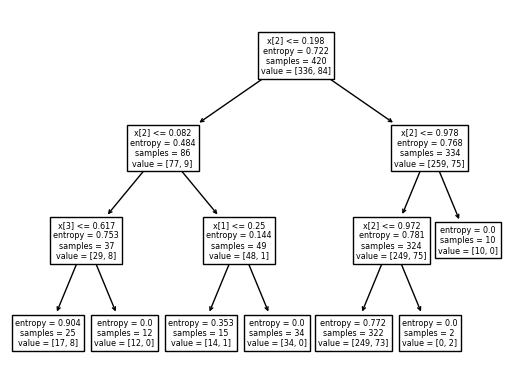

In [81]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [82]:
#Predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    179
1      1
dtype: int64

In [83]:
y_test.value_counts()

0    140
1     40
Name: TaxInc, dtype: int64

In [84]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [50]:
pd.crosstab(y_test,preds)

col_0,0,1
TaxInc,,
0,139,1
1,40,0


In [51]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.7722222222222223

In [52]:
np.mean(preds==y_test)

0.7722222222222223

# **Building Decision Tree Classifier (CART) using Gini Criteria**

In [53]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [54]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7722222222222223

In [57]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.7722222222222223